In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [54]:
df = pd.read_csv(r"C:\Users\MY PC\Desktop\DrDoS_DNS.csv")
df

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,17,2468,4,0,1580,0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05,DrDoS_DNS
1,17,133,4,0,5888,0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07,DrDoS_DNS
2,17,33509,200,0,88000,0,440.0,0.0,5968.545764,0.0,168.386935,0.0,168.386935,5968.545764,2.626160e+06,DrDoS_DNS
3,17,288495,200,0,88000,0,440.0,0.0,693.252916,0.0,1449.723618,0.0,1449.723618,693.252916,3.050313e+05,DrDoS_DNS
4,17,9,2,0,2062,0,1031.0,0.0,222222.222200,0.0,9.000000,0.0,9.000000,222222.222200,2.291111e+08,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33920,17,236,2,0,2848,0,1424.0,0.0,8474.576271,0.0,236.000000,0.0,236.000000,8474.576271,1.206780e+07,DrDoS_DNS
33921,17,47,2,0,274,0,137.0,0.0,42553.191490,0.0,47.000000,0.0,47.000000,42553.191490,5.829787e+06,DrDoS_DNS
33922,17,3,2,0,1158,0,579.0,0.0,666666.666700,0.0,3.000000,0.0,3.000000,666666.666700,3.860000e+08,DrDoS_DNS
33923,17,6,2,0,866,0,433.0,0.0,333333.333300,0.0,6.000000,0.0,6.000000,333333.333300,1.443333e+08,DrDoS_DNS


In [55]:
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33925 entries, 0 to 33924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   protocol                       33925 non-null  int64  
 1   flow_duration                  33925 non-null  int64  
 2   total_forward_packets          33925 non-null  int64  
 3   total_backward_packets         33925 non-null  int64  
 4   total_forward_packets_length   33925 non-null  int64  
 5   total_backward_packets_length  33925 non-null  int64  
 6   forward_packet_length_mean     33925 non-null  float64
 7   backward_packet_length_mean    33925 non-null  float64
 8   forward_packets_per_second     33925 non-null  float64
 9   backward_packets_per_second    33925 non-null  float64
 10  forward_iat_mean               33925 non-null  float64
 11  backward_iat_mean              33925 non-null  float64
 12  flow_iat_mean                  33925 non-null 

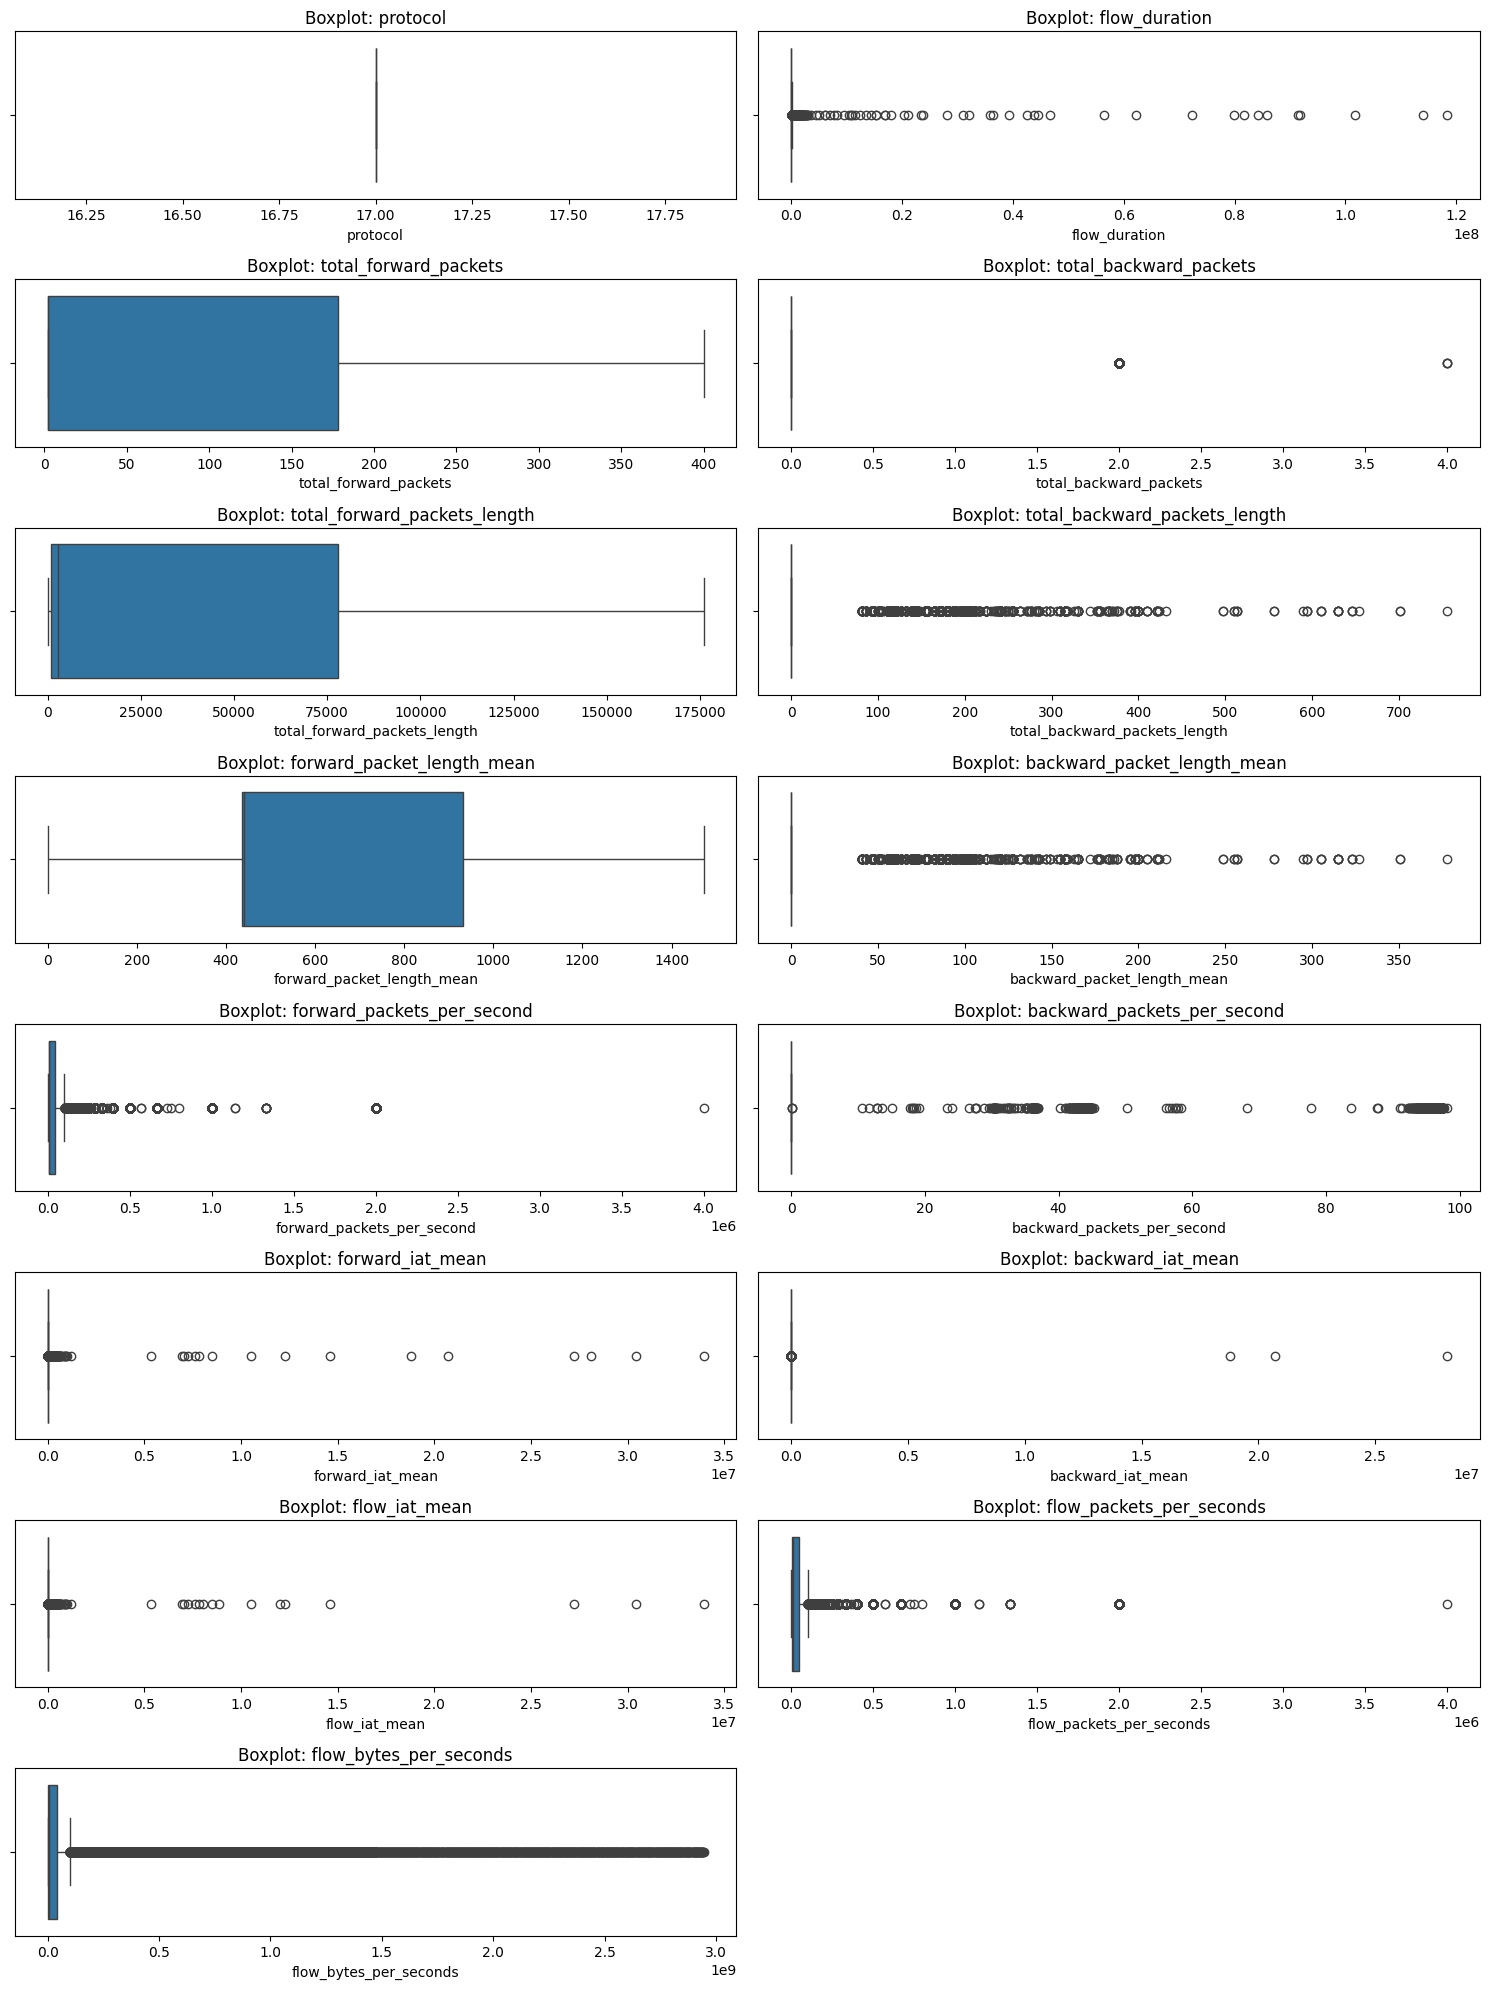

In [56]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [57]:
outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = {
        "num_outliers": len(outliers),
        "indices": outliers.index.tolist()[:5]
    }

print("\n--- Outlier Summary ---")
for col, info in outlier_summary.items():
    print(f"{col}: {info['num_outliers']} outliers | Sample indices: {info['indices']}")


--- Outlier Summary ---
protocol: 0 outliers | Sample indices: []
flow_duration: 3362 outliers | Sample indices: [3, 26, 28, 33, 45]
total_forward_packets: 0 outliers | Sample indices: []
total_backward_packets: 1116 outliers | Sample indices: [8, 12, 51, 146, 164]
total_forward_packets_length: 0 outliers | Sample indices: []
total_backward_packets_length: 1116 outliers | Sample indices: [8, 12, 51, 146, 164]
forward_packet_length_mean: 0 outliers | Sample indices: []
backward_packet_length_mean: 1116 outliers | Sample indices: [8, 12, 51, 146, 164]
forward_packets_per_second: 6832 outliers | Sample indices: [4, 7, 11, 14, 18]
backward_packets_per_second: 1116 outliers | Sample indices: [8, 12, 51, 146, 164]
forward_iat_mean: 4070 outliers | Sample indices: [0, 3, 10, 26, 28]
backward_iat_mean: 1111 outliers | Sample indices: [8, 12, 51, 146, 164]
flow_iat_mean: 5124 outliers | Sample indices: [0, 3, 8, 10, 12]
flow_packets_per_seconds: 6832 outliers | Sample indices: [4, 7, 11, 14, 1

In [58]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [59]:
#Normalization
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,0.0,0.033920,0.005025,0.0,0.008977,0.0,0.268342,0.0,0.015402,0.0,1.000000,0.0,1.000000,0.015402,0.006492,DrDoS_DNS
1,0.0,0.001815,0.005025,0.0,0.033455,0.0,1.000000,0.0,0.285803,0.0,0.086843,0.0,0.082837,0.285803,0.448907,DrDoS_DNS
2,0.0,0.460715,0.497487,0.0,0.500000,0.0,0.298913,0.0,0.056719,0.0,0.329847,0.0,0.316386,0.056719,0.026629,DrDoS_DNS
3,0.0,1.000000,0.497487,0.0,0.500000,0.0,0.298913,0.0,0.006588,0.0,1.000000,0.0,1.000000,0.006588,0.003093,DrDoS_DNS
4,0.0,0.000110,0.000000,0.0,0.011716,0.0,0.700408,0.0,1.000000,0.0,0.017630,0.0,0.016316,1.000000,1.000000,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33920,0.0,0.003231,0.000000,0.0,0.016182,0.0,0.967391,0.0,0.080533,0.0,0.462292,0.0,0.443677,0.080533,0.122368,DrDoS_DNS
33921,0.0,0.000632,0.000000,0.0,0.001557,0.0,0.093071,0.0,0.404381,0.0,0.092067,0.0,0.087857,0.404381,0.059114,DrDoS_DNS
33922,0.0,0.000027,0.000000,0.0,0.006580,0.0,0.393342,0.0,1.000000,0.0,0.005877,0.0,0.005020,1.000000,1.000000,DrDoS_DNS
33923,0.0,0.000069,0.000000,0.0,0.004920,0.0,0.294158,0.0,1.000000,0.0,0.011753,0.0,0.010668,1.000000,1.000000,DrDoS_DNS


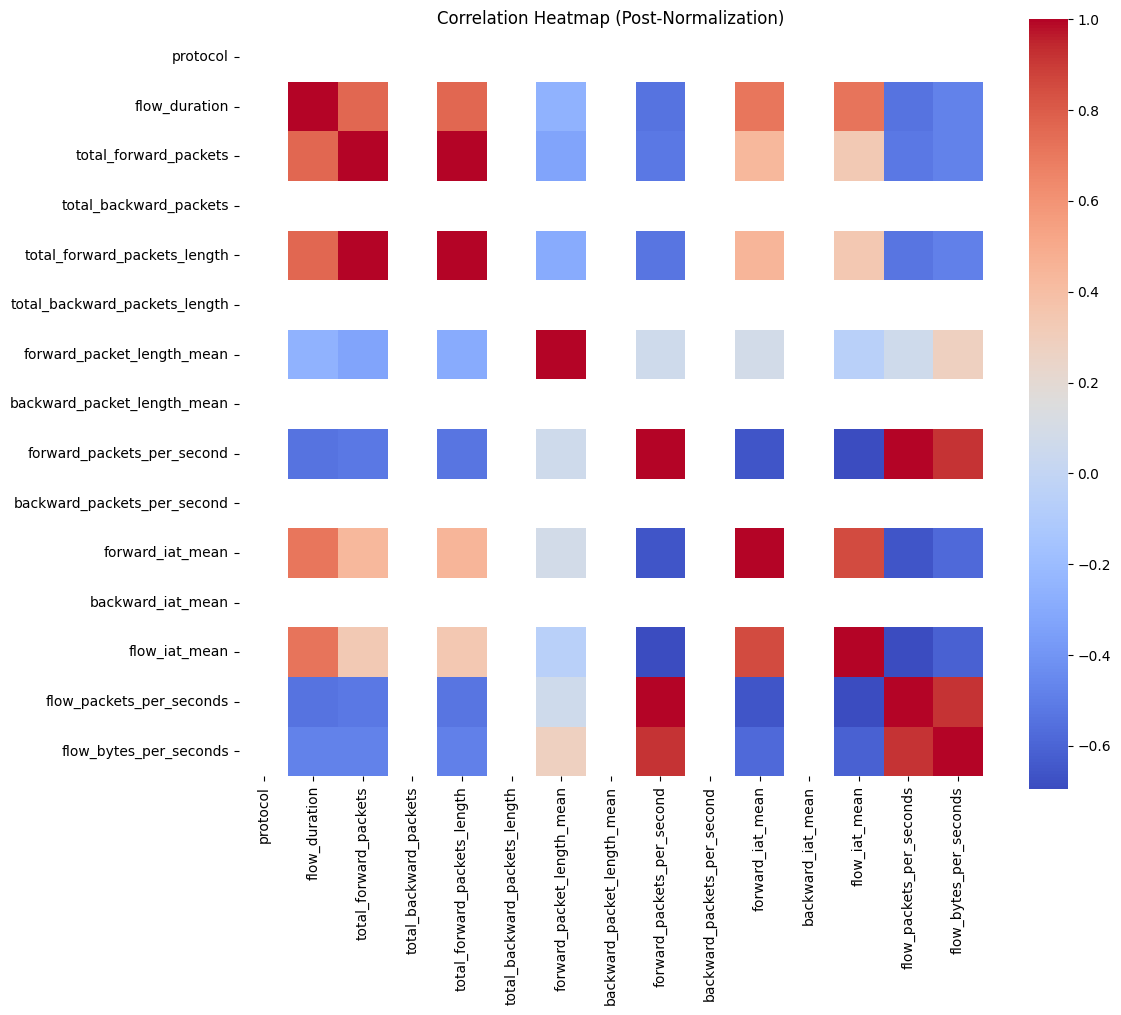

In [60]:
#Correlation Heat Map
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Post-Normalization)")
plt.show()

C:\Users\MY PC\AppData\Local\Temp\ipykernel_772\92406997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_str', data=df, palette="coolwarm")


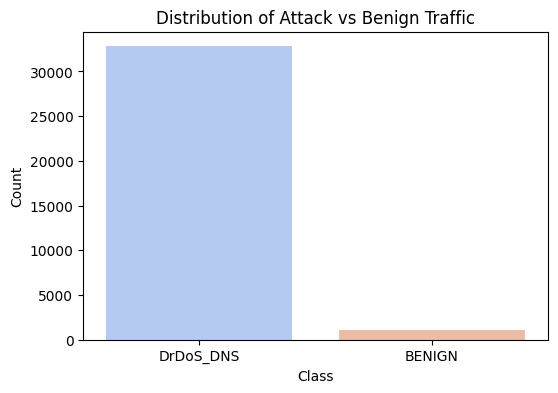

In [63]:
df['label_str'] = df['label'].map({0: "BENIGN", 1: "DrDoS_DNS"})
plt.figure(figsize=(6, 4))
sns.countplot(x='label_str', data=df, palette="coolwarm")
plt.title("Distribution of Attack vs Benign Traffic")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [64]:
# Encode label
df['label'] = df['label'].astype('category').cat.codes
df['label_str'] = df['label'].map({0: "BENIGN", 1: "DrDoS_DNS"}) 

X = df.drop(["label", "label_str"], axis=1) 
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [65]:
#Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995578481945468
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       219
           1       1.00      1.00      1.00      6566

    accuracy                           1.00      6785
   macro avg       1.00      1.00      1.00      6785
weighted avg       1.00      1.00      1.00      6785



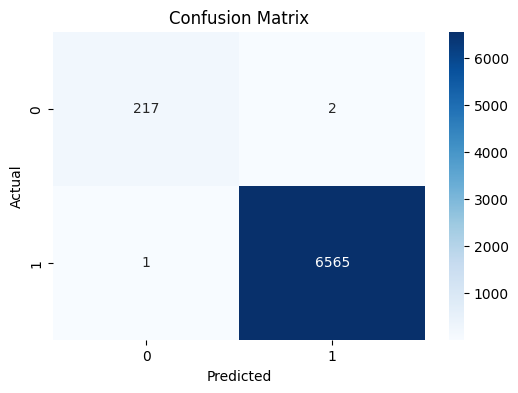

In [66]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

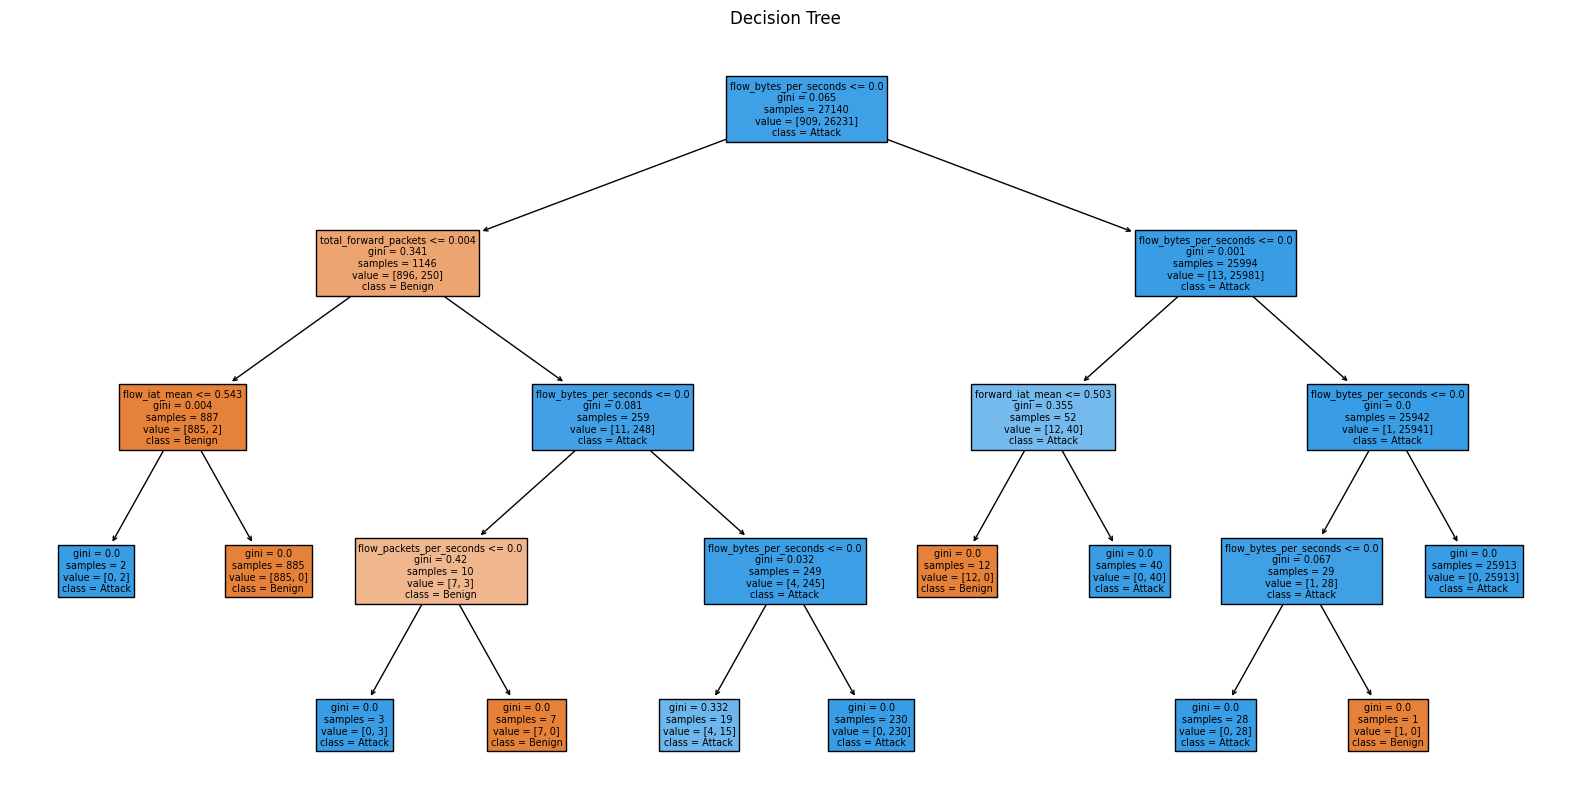

In [67]:
# Decision Tree Plot
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Benign", "Attack"])
plt.title("Decision Tree")
plt.show()

In [68]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

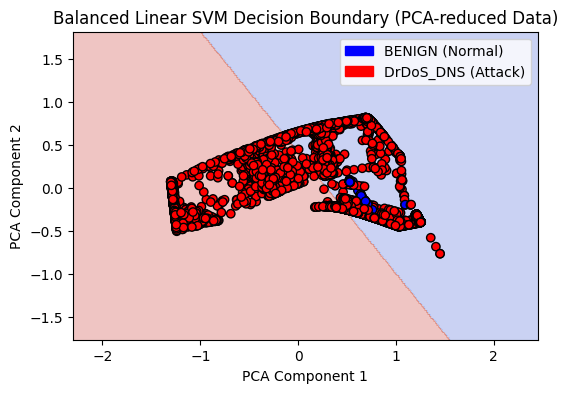

In [69]:
#plot SVM
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_model_balanced_linear = SVC(kernel='linear', class_weight='balanced')
svm_model_balanced_linear.fit(X_train_pca, y_train)

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = svm_model_balanced_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

cmap_custom = ListedColormap(['blue', 'red'])  # 0: BENIGN, 1: DrDoS_DNS
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_custom, edgecolor='black')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Balanced Linear SVM Decision Boundary (PCA-reduced Data)")

red_patch = mpatches.Patch(color='red', label='DrDoS_DNS (Attack)')
blue_patch = mpatches.Patch(color='blue', label='BENIGN (Normal)')
plt.legend(handles=[blue_patch, red_patch])

plt.show()

In [70]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

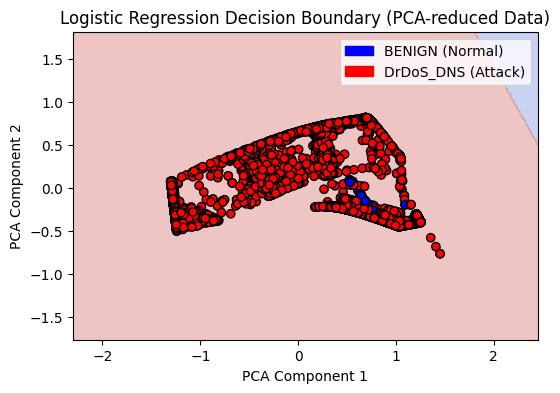

In [71]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

log_model_pca = LogisticRegression()
log_model_pca.fit(X_train_pca, y_train)

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = log_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

cmap_custom = ListedColormap(['blue', 'red']) 
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_custom, edgecolor='black')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Boundary (PCA-reduced Data)")

red_patch = mpatches.Patch(color='red', label='DrDoS_DNS (Attack)')
blue_patch = mpatches.Patch(color='blue', label='BENIGN (Normal)')
plt.legend(handles=[blue_patch, red_patch])

plt.show()

In [72]:
# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))

Decision Tree Accuracy: 0.9995578481945468
SVM Accuracy: 0.9997052321296979
Logistic Regression Accuracy: 0.9997052321296979


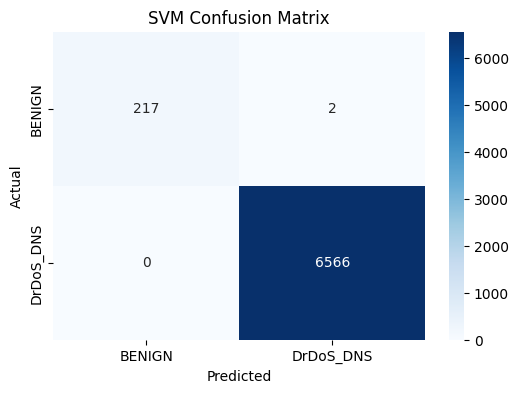

In [73]:
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=["BENIGN", "DrDoS_DNS"], 
    yticklabels=["BENIGN", "DrDoS_DNS"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [74]:
# Predictions for SVM
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.9997052321296979
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       219
           1       1.00      1.00      1.00      6566

    accuracy                           1.00      6785
   macro avg       1.00      1.00      1.00      6785
weighted avg       1.00      1.00      1.00      6785



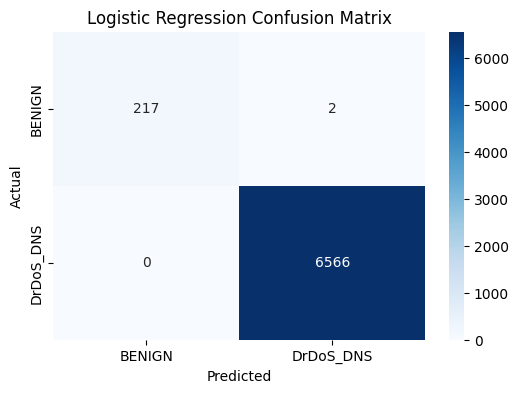

In [75]:
y_pred_log = log_model.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_log,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["BENIGN", "DrDoS_DNS"],
    yticklabels=["BENIGN", "DrDoS_DNS"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [76]:
# Predictions for Logistic Regression
log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.9997052321296979
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       219
           1       1.00      1.00      1.00      6566

    accuracy                           1.00      6785
   macro avg       1.00      1.00      1.00      6785
weighted avg       1.00      1.00      1.00      6785



In [77]:
#Feature Importance
features = X_train.columns
dt_importance = clf.feature_importances_
log_importance = log_model.coef_[0]
svm_importance = svm_model.coef_[0]

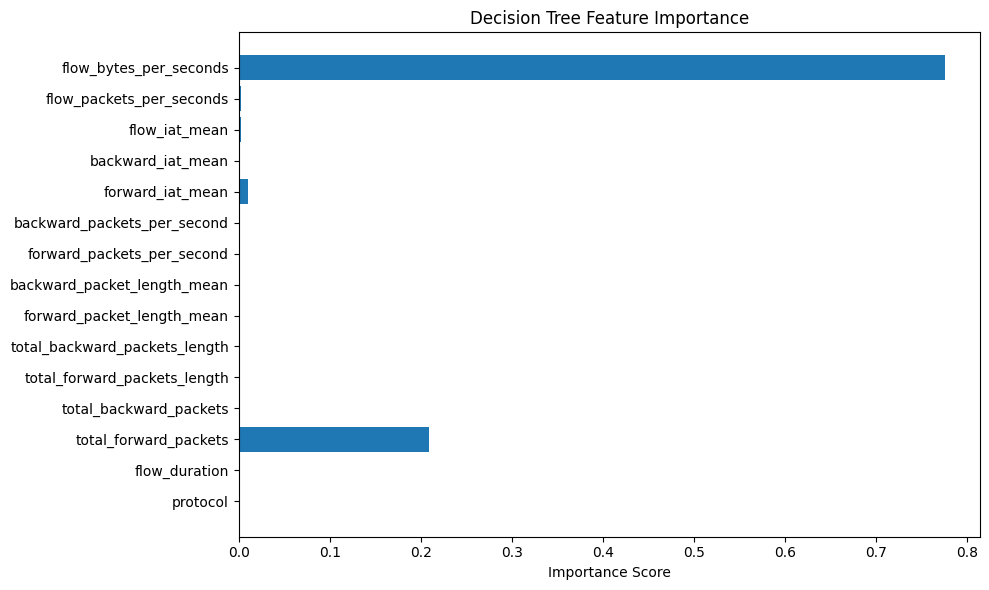

In [78]:
#Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(features, dt_importance)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

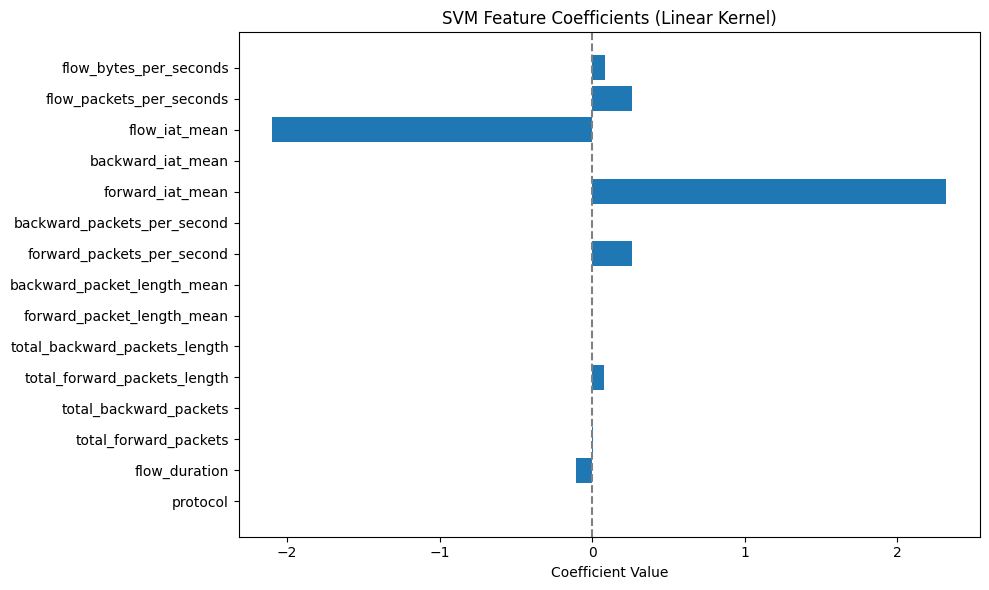

In [79]:
# SVM Coefficients (Linear Kernel)
plt.figure(figsize=(10, 6))
plt.barh(features, svm_importance)
plt.title("SVM Feature Coefficients (Linear Kernel)")
plt.xlabel("Coefficient Value")
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

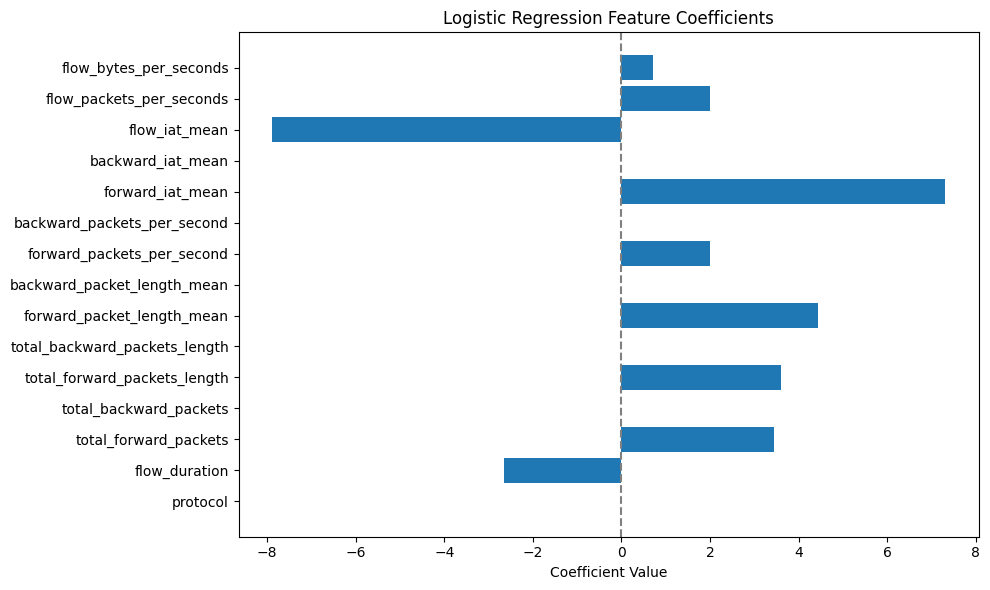

In [80]:
# Logistic Regression Coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, log_importance)
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [81]:
# Sample Prediction Options
print("=== OPTION A: First Sample from Test Set ===")
sample_fixed = X_test.iloc[0:1]
print("Sample input:\n", sample_fixed)
print("Prediction (Decision Tree):", clf.predict(sample_fixed)[0])
print("Prediction (SVM):", svm_model.predict(sample_fixed)[0])
print("Prediction (Logistic Regression):", log_model.predict(sample_fixed)[0])
print("Actual Label:", y_test.iloc[0])

=== OPTION A: First Sample from Test Set ===
Sample input:
        protocol  flow_duration  total_forward_packets  total_backward_packets  \
29685       0.0       0.245207               0.497487                     0.0   

       total_forward_packets_length  total_backward_packets_length  \
29685                           0.5                            0.0   

       forward_packet_length_mean  backward_packet_length_mean  \
29685                    0.298913                          0.0   

       forward_packets_per_second  backward_packets_per_second  \
29685                    0.106565                          0.0   

       forward_iat_mean  backward_iat_mean  flow_iat_mean  \
29685          0.175559                0.0       0.168101   

       flow_packets_per_seconds  flow_bytes_per_seconds  
29685                  0.106565                0.050032  
Prediction (Decision Tree): 1
Prediction (SVM): 1
Prediction (Logistic Regression): 1
Actual Label: 1


In [82]:
print("\n=== OPTION B: Random Sample from Test Set ===")
sample_random = X_test.sample(n=1, random_state=42)
print("Sample input:\n", sample_random)
print("Prediction (Decision Tree):", clf.predict(sample_random)[0])
print("Prediction (SVM):", svm_model.predict(sample_random)[0])
print("Prediction (Logistic Regression):", log_model.predict(sample_random)[0])
print("Actual Label:", y_test.loc[sample_random.index[0]])


=== OPTION B: Random Sample from Test Set ===
Sample input:
        protocol  flow_duration  total_forward_packets  total_backward_packets  \
25378       0.0       0.064072               0.005025                     0.0   

       total_forward_packets_length  total_backward_packets_length  \
25378                      0.033273                            0.0   

       forward_packet_length_mean  backward_packet_length_mean  \
25378                    0.994565                          0.0   

       forward_packets_per_second  backward_packets_per_second  \
25378                    0.008155                          0.0   

       forward_iat_mean  backward_iat_mean  flow_iat_mean  \
25378               1.0                0.0            1.0   

       flow_packets_per_seconds  flow_bytes_per_seconds  
25378                  0.008155                 0.01274  
Prediction (Decision Tree): 1
Prediction (SVM): 1
Prediction (Logistic Regression): 1
Actual Label: 1


In [83]:
#Input for new sample instance to be predicted
import numpy as np
manual_input = pd.DataFrame([np.zeros(len(X_train.columns))], columns=X_train.columns)

# Set feature values
manual_input.loc[0, 'flow_duration'] = 0.5
manual_input.loc[0, 'total_forward_packets'] = 0.6
manual_input.loc[0, 'flow_bytes_per_seconds'] = 0.9 
manual_input.loc[0, 'flow_packets_per_seconds'] = 0.7 
manual_input.loc[0, 'forward_iat_mean'] = 0.3
manual_input.loc[0, 'protocol'] = 0.0  

# Display the manual input
print("Manual Sample Input:")
display(manual_input.style.set_table_attributes("style='display:inline'").set_caption("Manual Input Features"))

# Show predictions
print("Predictions:")
print("Decision Tree Prediction:", clf.predict(manual_input)[0])
print("SVM Prediction:", svm_model.predict(manual_input)[0])
print("Logistic Regression Prediction:", log_model.predict(manual_input)[0])
print("Actual Label from Random Test Sample:", y_test.loc[sample_random.index[0]])


Manual Sample Input:


,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds
0,0.000000,0.500000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.700000,0.900000


Predictions:
Decision Tree Prediction: 1
SVM Prediction: 1
Logistic Regression Prediction: 1
Actual Label from Random Test Sample: 1


In [84]:
import time
# Decision Tree timing
start_dt = time.time()
clf.fit(X_train, y_train)
_ = clf.predict(X_test)
end_dt = time.time()
print(f"Decision Tree Time: {end_dt - start_dt:.4f} seconds")

# SVM timing
start_svm = time.time()
svm_model.fit(X_train, y_train)
_ = svm_model.predict(X_test)
end_svm = time.time()
print(f"SVM Time: {end_svm - start_svm:.4f} seconds")

# Logistic Regression timing
start_log = time.time()
log_model.fit(X_train, y_train)
_ = log_model.predict(X_test)
end_log = time.time()
print(f"Logistic Regression Time: {end_log - start_log:.4f} seconds")


Decision Tree Time: 0.0584 seconds
SVM Time: 0.2309 seconds
Logistic Regression Time: 0.0808 seconds
